Everything here 

http://people.duke.edu/~ccc14/sta-663-2017/13A_LinearAlgebra1.html

https://en.wikipedia.org/wiki/Matrix_decomposition

consider the following points when choosing the method of matrix decomposition:
- all of them approximate the matrix in some way.
- some may make the problem easier to solve.
- the algorithm.
   - Is there an efficient way to find the decomposition? (especially for large matrices. for example SVD is computed more efficiently for large matrices than eigen-decomposition.)
   - Can we obtain it with an online algorithm? (updating factorization when new data samples comes in without recomputing all the steps)

some points on the reason of matrix decompostion.

How do you actually solve a large system of linear equations on a computer and how do you actually diagonalize a large matrix (that theory tells you is diagonalizable) on a computer. These are very difficult problems since there is a huge gap between the theoretical results and actual computations. That gap is caused of course by rounding errors on a computer. Loads of books are written on the subject as, needless to say, it's of immense importance. Many factorizations of matrices (e.g., LU and QR) are meant to address such issues. To make computations more robust and more efficient.

...

https://lazyprogrammer.me/tutorial-principal-components-analysis-pca/

###  PCA
PCA finds a matrix Q that, when multiplied by the original data matrix X, returns a linearly transformed data matrix Z, where:

**Z = XQ**

The interesting thing about PCA is how it chooses Q.

PCA reduces dimensionality by moving as much “information” as possible into as few dimensions as possible. The information here is measured by unpredictability, i.e. variance. The end result is that the transformed matrix Z has most of its variance in the first column, less variance in the second column, even less variance in the third column, etc.

### Eigenvalues & Eigenvectors
when multiply a vector by a matrix, the direction of the vector is changed.

Eigenvalues λ and eigenvectors v have the property that, if multiplied by A, a matrix, is the same as multiplying the eigenvector by a constant – the eigenvalue, i.e. the eigenvector does not change direction, it only gets shorter or longer by a factor of λ. In other words:

**Av = λv**

where A is the matrix, v is the eigenvector and λ the eigenvalue.

In the case of PCA, all the eigenvectors from the empirical covariance matrix are lined upsuch that the corresponding λ, eigenvallues, are in descending order. In matrix form, the above can be expressed by:

**AV = VΛ **

where V is the matrix with eigenvectors as columns, which is orthonormal, and Λ is a diagonal matrix of eigenvalues.

### SVD or Diagonalization in finding the eigenpairs

The method from textbook – solving a polynomial to get the eigenvalues, plugging the eigenvalues into the eigenvalue equation to get the eigenvectors, etc. doesn’t really translate to computer code.

**SVD**
- Square the diagonal matrix S, and divide by sum(S) to obtain eigenvalues
- Matrix Vt (or U) will contain the eigenvectors

Since Λ is a diagonal matrix, there are no correlations in the transformed data. 

**The variance of each dimension of Z is equal to the eigenvalues.**

In addition, because we sorted the eigenvalues in descending order, the first dimension/coluumn of Z has the most variance, the second dimension/coluumn has the second-most variance, etc. So most of the information is kept in the leading dimensions/columns, as promised.

In [8]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [55]:
# print (z.shape)
# print (z.T)

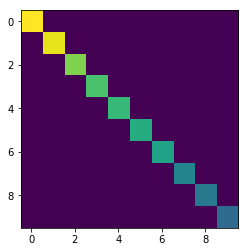

In [50]:
pca = PCA()

x = np.random.random((100,10)) # generate an N = 100, D = 10 random data matrix

# 1. find the principal components which are the linear combiation of the origianl data dimensions. 
# The full set of principal components has the same number as the number of dimensions in the original dataset
# 2. project the data to the span consists of the full set of principal components 

z = pca.fit_transform(x)

# visualize the covariance of the principal components in z
plt.imshow(np.cov(z.T))
plt.show()

In [56]:
# PCA summary function - where the input variable pca is a PCA object

def pca_summary(pca, standardised_data, out = True):
    names = ["PC" + str(i) for i in range(1, len(pca.explained_variance_ratio_) +  1)]
    
    a = list(np.std(pca.transform(standardised_data), axis = 0))
    
    # the highest eigenvalue indicates the highest variance in the data was observed in the direction of its eigenvector
    # The first principal component is calculated such that it accounts for the greatest possible variance in the data set.
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index = names, columns = columns)
    
    if out:
        print("Importance of components:")
#         display(summary)
    
    return summary

### the first PC preserves the greatest variance in the **projected** data 

In [14]:
pca = PCA().fit(x)
summary = pca_summary(pca, x)
summary

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.365495,0.163105,0.163105
PC2,0.346078,0.146235,0.309340
PC3,0.323277,0.127601,0.436941
PC4,0.292866,0.104723,0.541665
PC5,0.282906,0.097721,0.639386
PC6,0.270190,0.089134,0.728520
PC7,0.255617,0.079778,0.808298
PC8,0.240683,0.070729,0.879027
PC9,0.226149,0.062444,0.941471


In [73]:
print (np.std(pca.transform(x), axis = 0))
print (np.std(pca.transform(x)[:, 0]))

# the first PC preserves the greatest variance in the projected data 
onedim = PCA(n_components = 1).fit_transform(x)
np.std(onedim)

[ 0.35139917  0.3446172   0.31539382  0.29653823  0.28780787  0.27672789
  0.26668363  0.23607789  0.22374838  0.20809888]
0.35139917005


0.35139917004963794

Observe that the off-diagonals are 0 and that the variances are in decreasing order.
Can also confirm that QTQ=I.

In [35]:
# show the full set of principal components 
pca.components_

array([[ 0.40394425,  0.58413868,  0.28039281, -0.41928397,  0.12081918,
        -0.01159679, -0.2694921 ,  0.02875673, -0.09772216,  0.3787579 ],
       [ 0.55492668, -0.45315528,  0.17946532,  0.31313053, -0.3284494 ,
        -0.27255056, -0.24114644,  0.17510041,  0.12453115,  0.26451003],
       [-0.02374078, -0.04142466, -0.29339907,  0.10728489,  0.43180504,
         0.01104663, -0.73780983, -0.16178221,  0.3537723 , -0.13363391],
       [ 0.05166975, -0.29592019, -0.10532774, -0.18723837,  0.07257115,
         0.73729121,  0.13167153,  0.09590025,  0.3105313 ,  0.4379275 ],
       [ 0.1936411 , -0.45128959,  0.02354271, -0.30975952,  0.47318432,
        -0.27350621,  0.22771445, -0.50511269, -0.20740137,  0.11669849],
       [ 0.06384691,  0.22552556, -0.28174515,  0.63330954,  0.09851148,
         0.16239397,  0.03796483, -0.290403  , -0.41983784,  0.4080259 ],
       [-0.15134061,  0.10334498,  0.73085314,  0.37359898,  0.23501776,
         0.06033835,  0.13908981, -0.25038929

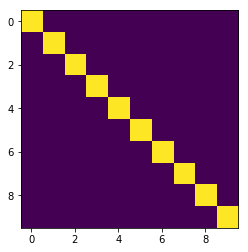

[[ 1.  0.  0. -0. -0. -0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0. -0. -0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0. -0. -0.  0.]
 [-0.  0.  0.  1.  0.  0. -0.  0.  0. -0.]
 [-0. -0.  0.  0.  1.  0.  0. -0.  0. -0.]
 [-0. -0.  0.  0.  0.  1. -0. -0. -0.  0.]
 [ 0.  0.  0. -0.  0. -0.  1. -0.  0. -0.]
 [ 0.  0. -0.  0. -0. -0. -0.  1.  0.  0.]
 [ 0.  0. -0.  0.  0. -0.  0.  0.  1.  0.]
 [ 0.  0.  0. -0. -0.  0. -0.  0.  0.  1.]]


In [29]:
QTQ = pca.components_.T.dot(pca.components_)
plt.imshow(QTQ)
plt.show()

print (np.around(QTQ, decimals=2))